# Letters.csv

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, classification_report, mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# from yellowbrick.classifier import ROCAUC

In [57]:
import os
os.chdir('/content/drive/MyDrive/Colab Files/UNIVAQ_codes/Advance_ML_Techniques')
!ls

knn_caravan.ipynb  kNN.ipynb  letters.csv


## Import Files

In [58]:
let = pd.read_csv('letters.csv')
let.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [59]:
let.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       19999 non-null  object
 1   2       19999 non-null  int64 
 2   8       19999 non-null  int64 
 3   3       19999 non-null  int64 
 4   5       19999 non-null  int64 
 5   1       19999 non-null  int64 
 6   8.1     19999 non-null  int64 
 7   13      19999 non-null  int64 
 8   0       19999 non-null  int64 
 9   6       19999 non-null  int64 
 10  6.1     19999 non-null  int64 
 11  10      19999 non-null  int64 
 12  8.2     19999 non-null  int64 
 13  0.1     19999 non-null  int64 
 14  8.3     19999 non-null  int64 
 15  0.2     19999 non-null  int64 
 16  8.4     19999 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


## Unique Values

In [60]:
let['T'].unique()

array(['I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F',
       'C', 'T', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [61]:
for i in list(let.columns):
    print(i, let[i].unique(), len(let[i].unique()))
    print('***************')


T ['I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'T' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z'] 26
***************
2 [ 5  4  7  2  1 11  3  6 12  8  9 10 13  0 15 14] 16
***************
8 [12 11  1  2 15  9 13  4 10  3  5  6 14  7  8  0] 16
***************
3 [ 3  6  5  4 13  8  2  7 11 12  9  1 10  0 15 14] 16
***************
5 [ 7  8  6  1  4  2  9  3  5 11 10  0 12 13 15 14] 16
***************
1 [ 2  6  3  1  4  7  9  5 10  8  0 11 14 13 12 15] 16
***************
8.1 [10  5  8 13  6  7  3  9  0  4  1 12 11 14  2 15] 16
***************
13 [ 5  6  9  8  7  2 11 10  1  4 14  0  3 12 15 13] 16
***************
0 [ 5  2  4  6  3  7  9  1  8 10 13 14 15  0 12 11] 16
***************
6 [ 4  6  9  2  8  3  5 11  7  1 10  0 13 14 12 15] 16
***************
6.1 [13 10  4  6  5  7  8 12 11 14  0  9  3 15  1  2] 16
***************
10 [ 3  4  5  6  2  1  7  9  8 11 10  0 12 14 13 15] 16
***************
8.2 [ 9  7 10  6  8 11  4 12 14  3 15  5 13  0  2  1] 16
***************
0.1 [ 2  3  

In [62]:
let_y = let['T']
let_X = let.drop(columns = 'T')

## Training & Split

In [63]:
y = let_y.copy()
X = let_X.copy()


# scale the data by standardization

X = StandardScaler().fit_transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.75, random_state=42, stratify = y 
    )

In [65]:
knnclf = KNeighborsClassifier()

In [66]:
k = np.arange(1, 31)
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [67]:
# A grid search to find the best k parameter using 5 cross validations.

parameters= [{'n_neighbors': k} ]
Grid = GridSearchCV(knnclf, parameters, cv = 5 )
Grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}])

##  Best k

In [68]:
bestk_model = Grid.best_estimator_
bestk_model

KNeighborsClassifier(n_neighbors=1)

In [69]:
print(bestk_model)

print(str(bestk_model))

KNeighborsClassifier(n_neighbors=1)
KNeighborsClassifier(n_neighbors=1)


In [70]:
# dataframe of split results and rank

out = Grid.cv_results_
out = pd.DataFrame(out)
out.iloc[:, 4:].sort_values(by = "rank_test_score")

,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1,{'n_neighbors': 1},0.900,0.890,0.889,0.891,0.888889,0.891778,0.004182,1
2,3,{'n_neighbors': 3},0.879,0.855,0.866,0.870,0.869870,0.867974,0.007765,2
4,5,{'n_neighbors': 5},0.872,0.855,0.863,0.870,0.858859,0.863772,0.006452,3
3,4,{'n_neighbors': 4},0.876,0.848,0.851,0.874,0.860861,0.861972,0.011474,4
5,6,{'n_neighbors': 6},0.863,0.841,0.851,0.868,0.848849,0.854370,0.009807,5
1,2,{'n_neighbors': 2},0.867,0.847,0.849,0.852,0.850851,0.853170,0.007120,6
6,7,{'n_neighbors': 7},0.859,0.841,0.850,0.857,0.856857,0.852771,0.006627,7
7,8,{'n_neighbors': 8},0.855,0.818,0.839,0.857,0.850851,0.843970,0.014408,8
8,9,{'n_neighbors': 9},0.848,0.823,0.832,0.848,0.840841,0.838368,0.009679,9
9,10,{'n_neighbors': 10},0.845,0.821,0.817,0.845,0.833834,0.832367,0.011719,10


In [71]:
k = 1
knnclf2 = KNeighborsClassifier(n_neighbors = 1)

## Accuracy Report

In [72]:
# Fit the classifier
knnclf2.fit(X_train, y_train)

# Evaluate the outcome on the train set using R^2
r2_train = knnclf2.score(X_train, y_train)

# Print results
print(f'kNN model with {k} neighbors gives R^2 on the train set: {r2_train:.5}')

kNN model with 1 neighbors gives R^2 on the train set: 1.0


In [73]:
# Evaluate the outcome on the test set using R^2
r2_test = knnclf2.score(X_test, y_test)

# Print results
print(f'kNN model with {k} neighbors gives R^2 on the test set: {r2_test:.5}')

kNN model with 1 neighbors gives R^2 on the test set: 0.90687


In [74]:
y_pred = knnclf2.predict(X_test)
accuracy_score(y_pred, y_test)

0.9068666666666667

In [75]:
# RocCurveDisplay.from_estimator(knnclf2, X_test, y_test)

## Confusion Matrix

In [76]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[570   0   2   1   0   0   0   1   0   1   0   1   2   1   0   0   0   1
    1   1   1   0   1   0   7   1]
 [  0 529   0   1   4   1   1   4   0   0   0   0   1   1   3   1   1  12
    1   1   2  10   0   1   0   1]
 [  1   0 526   0   7   0   8   1   0   0   0   2   0   0   2   0   1   0
    0   1   3   0   0   0   0   0]
 [  0  17   1 524   0   3   4  11   0   0   1   0   0   3  17   2   1  13
    2   0   1   1   0   3   0   0]
 [  0   6  14   0 492   3   6   5   0   0  12   0   0   0   0   4   2   0
    6   1   0   2   0  13   0  10]
 [  0   2   0   2   2 506   0   3   4   3   0   0   0   2   0  32   0   1
    2  17   0   3   1   1   0   0]
 [  1   4   2   2  25   0 510   4   0   0   4   1   1   0  14   0   3   1
    3   1   0   2   2   0   0   0]
 [  0  11   2  18   3   3   4 441   0   2  25   2   0   1   4   1   2  16
    3   1   4   2   0   2   2   1]
 [  0   2   0   5   0   4   0   0 532  17   0   1   0   1   0   0   1   0
    2   0   0   0   0   1   0   0]
 [  0   1   0   7  

Text(0.5, 1.0, 'Confusion matrix')

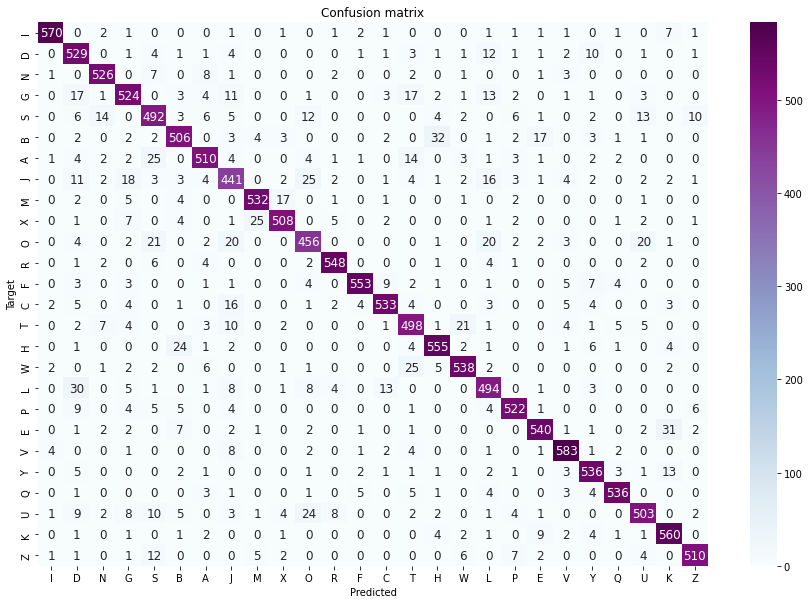

In [77]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15, 10))
sns.heatmap(cm, annot=True, xticklabels=list(let['T'].unique()), 
            yticklabels=list(let['T'].unique()), fmt='g',cmap='BuPu', annot_kws={"fontsize":12})
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')

In [78]:
 # Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.98      0.96      0.97       592
           B       0.82      0.92      0.87       575
           C       0.94      0.95      0.95       552
           D       0.88      0.87      0.87       604
           E       0.83      0.85      0.84       576
           F       0.89      0.87      0.88       581
           G       0.92      0.88      0.90       580
           H       0.81      0.80      0.80       550
           I       0.94      0.94      0.94       566
           J       0.94      0.91      0.92       560
           K       0.84      0.82      0.83       554
           L       0.95      0.96      0.96       571
           M       0.97      0.93      0.95       594
           N       0.94      0.91      0.92       587
           O       0.85      0.88      0.86       565
           P       0.91      0.92      0.91       602
           Q       0.93      0.92      0.92       587
           R       0.85    

## Using Different Columns

In this section, we progressively add more columns to the data. 

In [79]:
X.shape[1]

16

In [80]:
lst = [i for i in  range(1, X.shape[1] +1)]
lst_X = ['X0']

for i in lst:
    lst_X.append('X' + str(i))
lst_X

['X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16']

In [81]:
X = let_X.copy()
X

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [82]:
# This for-loop takes a column from the original letters.csv dataframe and inserts it into the list lst_X

for i in range(1, 17):
    lst_X[i] = X.iloc[:, 0:i]
# del lst_X[0]

In [83]:
lst_X[1] # column 1

,2
0,5
1,4
2,7
3,2
4,4
...,...
19994,2
19995,7
19996,6
19997,2


In [84]:
lst_X[16]  # columns 1-15 

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


The two results above shows that out list `lst_X` contains dataframes that are built progressively from the letters.csv data

### Train & Split

In [85]:
lst_X[1]

,2
0,5
1,4
2,7
3,2
4,4
...,...
19994,2
19995,7
19996,6
19997,2


In [86]:
lst_X[5].shape

(19999, 5)

In [87]:
# A dictionary for storing the result of our model results.
output = {'no_of_variables':[], 'train_acc':[], 'test_acc':[], 'k': []}

In [88]:
for i in range(1,17):

    X = lst_X[i].copy()
    
    X = StandardScaler().fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.75, random_state=42, stratify = y 
    )

    # we first use the best k from the earlier model we had
    k = 1
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier
    knn.fit(X_train, y_train)

    # Evaluate the outcome on the train set using R^2
    r2_train = knn.score(X_train, y_train)

    # Evaluate the outcome on the test set using R^2
    r2_test = knn.score(X_test, y_test)

    # Push the result into the dictionary file 
    output['no_of_variables'].append(i)
    output['train_acc'].append(r2_train)
    output['test_acc'].append(r2_test)
    output['k'].append(k)

# Make dictionary of result into a dataframe
df = pd.DataFrame.from_dict(output)
df


,no_of_variables,train_acc,test_acc,k
0,1,0.039608,0.040000,1
1,2,0.076415,0.064600,1
2,3,0.155431,0.098667,1
3,4,0.248250,0.133467,1
4,5,0.438288,0.188667,1
5,6,0.729746,0.257467,1
6,7,0.912182,0.398667,1
7,8,0.982797,0.531133,1
8,9,0.997399,0.662333,1
9,10,0.998600,0.733400,1


From the above dataframe of results, we see that as more variables are being added into the data, our accuracy result becomes better.

### Train using different columns and finding the best k for each columns.

In [89]:
output_k = {'no_of_variables':[], 'train_acc':[], 'test_acc':[], 'k_model': []}

for i in range(1,17):

    X = lst_X[i].copy()

    X = StandardScaler().fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.75, random_state=42, stratify = y 
    )
    
    k = np.arange(1, 31)

    knnclf = KNeighborsClassifier()

    parameters= [{'n_neighbors': k} ]
    Grid = GridSearchCV(knnclf, parameters, cv = 5 )
    Grid.fit(X_train, y_train)

    best_knn_model = Grid.best_estimator_

    # Fit the classifier
    best_knn_model.fit(X_train, y_train)

    # Evaluate the outcome on the train set using R^2
    r2_train = best_knn_model.score(X_train, y_train)

    # Evaluate the outcome on the test set using R^2
    r2_test = best_knn_model.score(X_test, y_test)

    # Push the result into the dictionary file 
    output_k['no_of_variables'].append(i)
    output_k['train_acc'].append(r2_train)
    output_k['test_acc'].append(r2_test)
    output_k['k_model'].append(str(best_knn_model))

In [90]:
# Make dictionary of result into a dataframe

df_k = pd.DataFrame.from_dict(output_k)
df_k

,no_of_variables,train_acc,test_acc,k_model
0,1,0.054411,0.049133,KNeighborsClassifier(n_neighbors=8)
1,2,0.100820,0.073200,KNeighborsClassifier(n_neighbors=18)
2,3,0.167634,0.110400,KNeighborsClassifier(n_neighbors=17)
3,4,0.232847,0.136867,KNeighborsClassifier(n_neighbors=8)
4,5,0.375475,0.177400,KNeighborsClassifier(n_neighbors=2)
5,6,0.729746,0.257467,KNeighborsClassifier(n_neighbors=1)
6,7,0.912182,0.398667,KNeighborsClassifier(n_neighbors=1)
7,8,0.982797,0.531133,KNeighborsClassifier(n_neighbors=1)
8,9,0.997399,0.662333,KNeighborsClassifier(n_neighbors=1)
9,10,0.998600,0.733400,KNeighborsClassifier(n_neighbors=1)


From the above, we see a more interesting result. When we had a lesser number of columns/features/variables, the model gets the best accuracy by using higher value of `k`, but when the number of variables became 6 or more, `k=1` gave the best outcome in terms of the model accuracy.